573
573
573


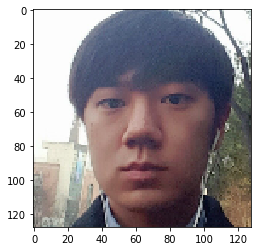

 answer y: 3  prediction: [[0.00537159 0.00424242 0.01893783 0.9641342  0.00808291]]


In [1]:
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential,load_model
from tensorflow.python.keras.layers import Dense, Activation
import numpy as np
from numpy import argmax,array
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2
# 2. Model 불러오기
from tensorflow.python.keras.models import load_model

model = load_model('animal_model_man.h5',compile = False)
categories = ['dog','cat','bear','hamster','horse']


test_img = cv2.imread(r'C:\Users\1217s\Desktop\capstone deeplearning\test-man\dog\3.jpg',1)

import matplotlib.pyplot as plt

b,g,r = cv2.split(test_img)
test_img = cv2.merge([r,g,b])

face_cascade = cv2.CascadeClassifier(r'C:\Users\1217s\Desktop\capstone deeplearning\opencv-master\opencv-master\data\haarcascades/haarcascade_frontalface_default.xml')
eye_casecade = cv2.CascadeClassifier(r'C:\Users\1217s\Desktop\capstone deeplearning\opencv-master\opencv-master\data\haarcascades/haarcascade_eye.xml')
test = np.empty(1, dtype=np.float32)

try:
        gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1,3)

except Exception as e:

        print(str(e))
for (x,y,w,h) in faces:
    try:
            cropped = test_img[y - int(h / 4):y + h + int(h / 4), x - int(w / 4):x + w + int(w / 4)]
            if cropped.shape > test.shape:
                    test = cropped

                
    except Exception as e:
            print(str(e))

            
test = test.astype('float32')/255.            
test = cv2.resize(test,(128,128))
plt.imshow(test)
plt.show()
test = np.expand_dims(test,0)



y_predicted = model.predict(test)

print(
          " answer y:", np.argmax(y_predicted),
            " prediction:", np.array(y_predicted))
